(machine_learning_basics.scaling=)
# Scaling
When using machine learning algorithms for processing data, the range of parameters is crucial. To get different parameters in the same range, scaling might be necessary.

See also
* [Standardization using scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

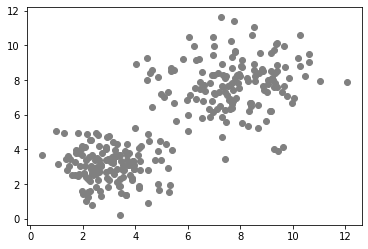

In [2]:
data1 = generate_biomodal_2d_data()

plt.scatter(data1[:, 0], data1[:, 1], c='grey')

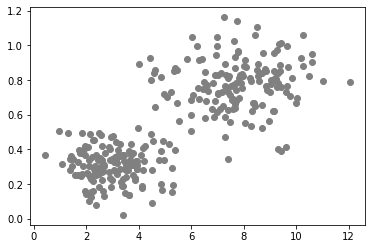

In [3]:
data2 = generate_biomodal_2d_data()
data2[:, 1] = data2[:, 1] * 0.1

plt.scatter(data2[:, 0], data2[:, 1], c='grey')

## Clustering data in different ranges
We will now cluster the two _apparently similar_ data sets using [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering). The effect can also be observed when using other algorithms. To make sure we apply the same algorithm using the same configuration to both datasets, we encapsulate it into a function and reuse it.

In [4]:
def classify_and_plot(data):
    number_of_classes = 2
    classifier = KMeans(n_clusters=number_of_classes)
    classifier.fit(data)
    prediction = classifier.predict(data)

    colors = ['orange', 'blue']
    predicted_colors = [colors[i] for i in prediction]

    plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

When applying the same method to both data sets, we can observe that the data points in the center are classified differently. The only difference between the data sets is their data range. The data points are differently scaled along one axis.

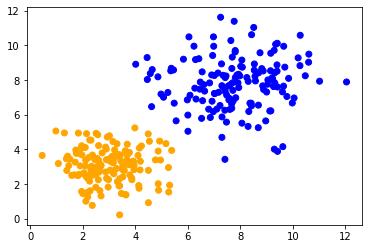

In [5]:
classify_and_plot(data1)

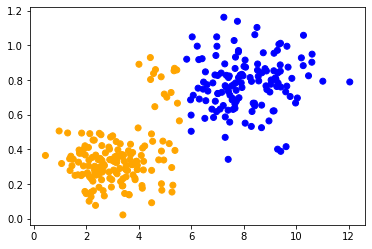

In [6]:
classify_and_plot(data2)

## Standard Scaling
[Standard scaling](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) is a technique to change the range of data to a fixed range, e.g. `[0, 1]`. It allows to have identical results in case of data that was in different ranges.

In [7]:
def scale(data):
    scaler = StandardScaler().fit(data)
    return scaler.transform(data)

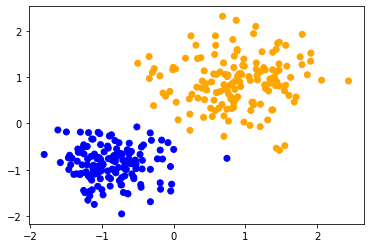

In [8]:
scaled_data1 = scale(data1)

classify_and_plot(scaled_data1)

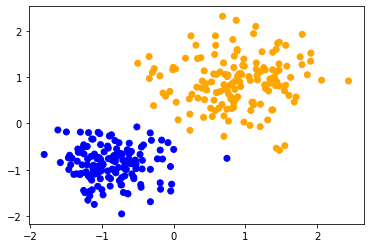

In [9]:
scaled_data2 = scale(data2)

classify_and_plot(scaled_data2)